In [2]:
%%capture
import os
import sys
import random
import numpy as np
import pandas as pd
import cv2
from keras.preprocessing.image import img_to_array
try:
    from imutils import paths
except ImportError:
    !pip install imutils
    from imutils import paths
    
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
# lets start by examining the number of images available in training set
dir_train = "../input/intel-image-classification/seg_train/seg_train/"
for segment in os.listdir(dir_train):
    print("'{}' images in '{}' category".format(
        len(list(paths.list_images(dir_train + segment))),
        segment
    ))
print("Total '{}' images in training set".format(len(list(paths.list_images(dir_train)))))

'2271' images in 'forest' category
'2191' images in 'buildings' category
'2404' images in 'glacier' category
'2382' images in 'street' category
'2512' images in 'mountain' category
'2274' images in 'sea' category
Total '14034' images in training set


So the training set looks failry balanced with similar number of images in each class. Let's pick some random images from each class and try to visualize them

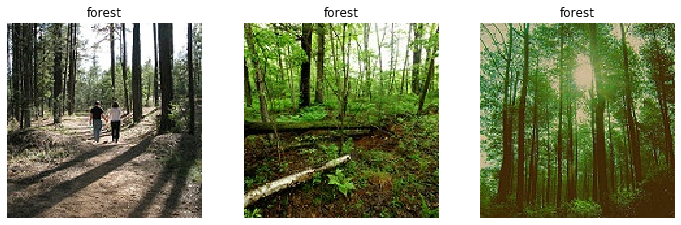

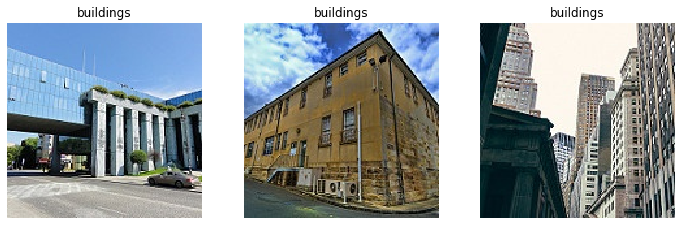

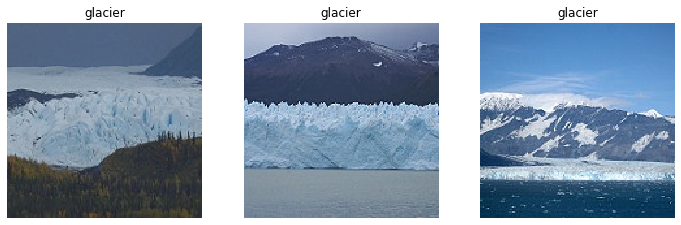

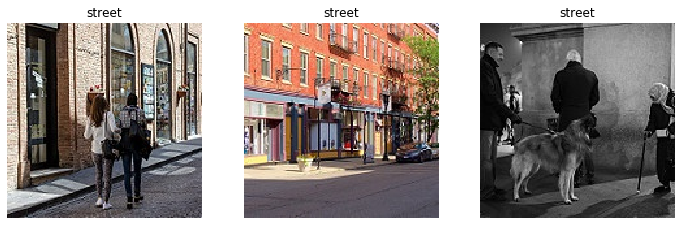

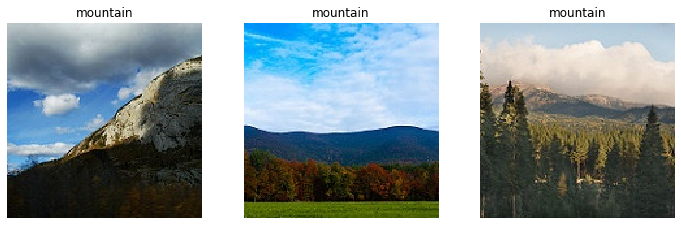

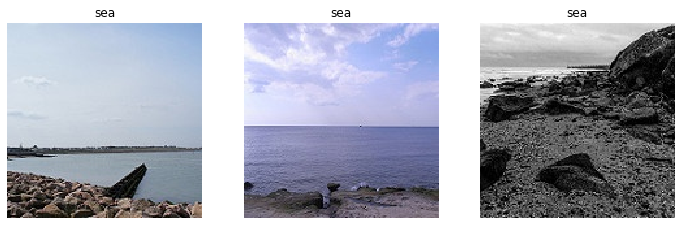

In [42]:
class_list = os.listdir(dir_train)

# number of images to display for each class
columns = 3

# input shape 150x150
shape = (150, 150)

# let's create a dictioanry with all the classes and some random images to display
classes = { 
    cls : [
        # read each mage and change the default colorspace
        cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB) for img in random.sample(
            # randomly sample images (column length) per class
            list(paths.list_images(dir_train + cls)), columns
        )
    ] for cls in class_list
}

# method to displays images for 'len(classes)' classes 'len(columns)' images per row
def display(classes, columns, cmap=None):
    for _class in classes:
        #print(random_images)
        fig, axes = plt.subplots(nrows=1, ncols=columns, figsize=(10, 10), squeeze=False)
        fig.tight_layout()
        for l in range(1):
            for m, img in enumerate(classes[_class]):
                axes[l][m].imshow(img, cmap=cmap)
                axes[l][m].axis("off")
                axes[l][m].set_title(_class)
    # done displaying
    
# display images
display(classes, columns)

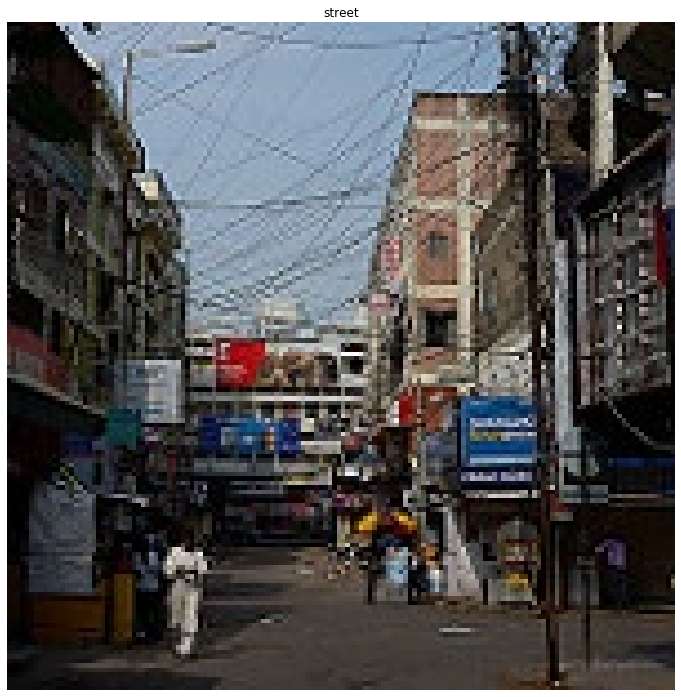

In [41]:
# let us read a random image from a class and examine it for preprocessing

key = random.choice(list(classes.items()))[0]
image = random.sample(list(classes[key]), 1)
display({key:image}, 1)